# Data Analysis 

In [1]:
# import the libraries that are needed
import pandas as pd
import numpy as np
# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the dataset 
df = pd.read_csv('heart.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
# To find the total number of rows and columns
df.shape

(303, 14)

In [4]:
# Knowing more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Gives a closer look at the factors in the df.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#isna () -To detect the missing values 
# Returns the missing values in the column
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
"""
0 : Heart Disease Absent
1 : Heart disease Present
"""
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

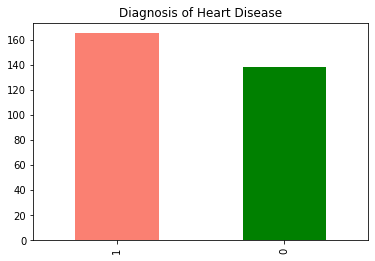

In [8]:
#Plot a simple bar graph about the diagnosis of the heart disease
df['target'].value_counts().plot(kind = 'bar', color = ['Salmon','Green'], title = 'Diagnosis of Heart Disease');

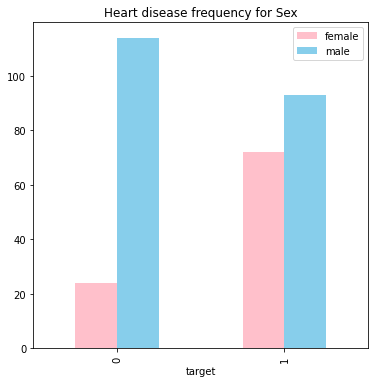

In [9]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",color=["pink","skyblue"],figsize=(6,6));
plt.title("Heart disease frequency for Sex")
plt.legend(["female","male"])

<AxesSubplot:ylabel='Frequency'>

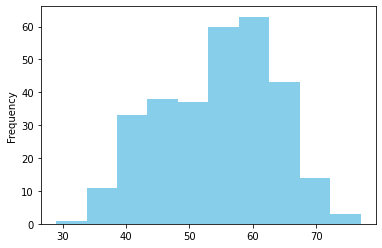

In [10]:
# Lets plot a graph that takes 'age' as a factor for comparison vs max heart rate

df['age'].plot(kind='hist',color='skyblue')


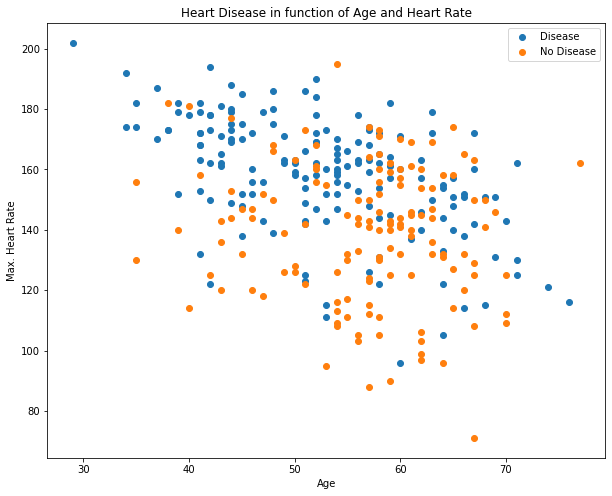

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(x = df[df['target']==1]['age'], y = df.thalach[df.target == 1])
plt.scatter(x = df[df['target']==0]['age'], y = df.thalach[df.target == 0])
# Adding info to the graph
plt.title("Heart Disease in function of Age and Heart Rate")
plt.xlabel('Age')
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease","No Disease"])

Text(0.5, 0, 'chest pain')

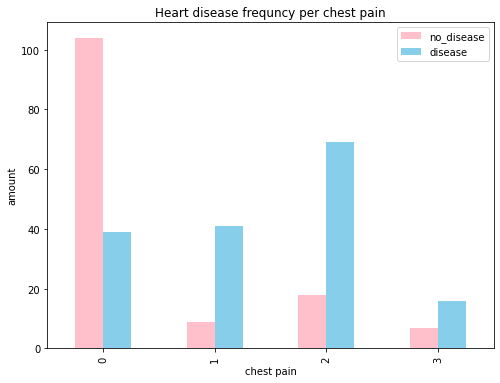

In [12]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",color=["pink","skyblue"],figsize=(8,6));
plt.title("Heart disease frequncy per chest pain")
plt.legend(["no_disease","disease"])
plt.ylabel("amount")
plt.xlabel("chest pain")

<AxesSubplot:ylabel='Density'>

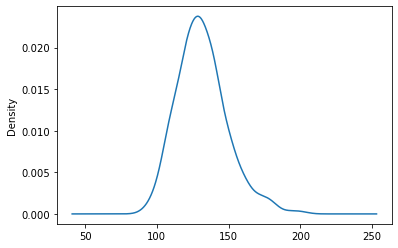

In [13]:
#Resting Blood Pressure
df['trestbps'].plot(kind='kde')

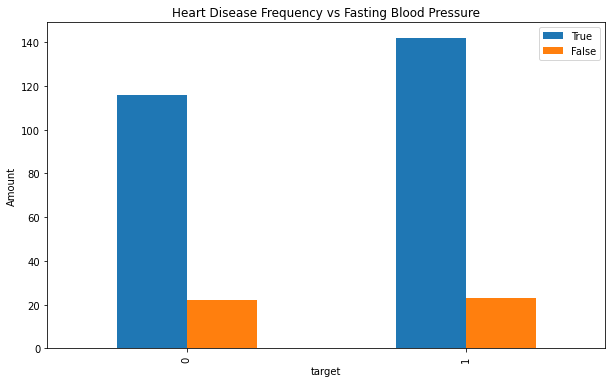

In [14]:
pd.crosstab(df['target'],df['fbs']).plot(kind='bar',figsize=(10,6))
plt.ylabel("Amount")
plt.title("Heart Disease Frequency vs Fasting Blood Pressure")
plt.legend(["True","False"])

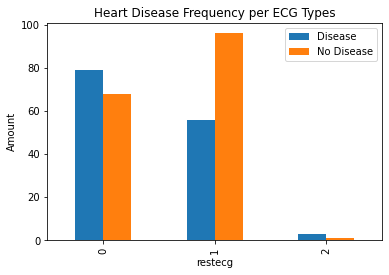

In [15]:
pd.crosstab(df["restecg"],df['target']).plot(kind='bar')
plt.title("Heart Disease Frequency per ECG Types")
plt.ylabel('Amount')
plt.legend(['Disease','No Disease'])

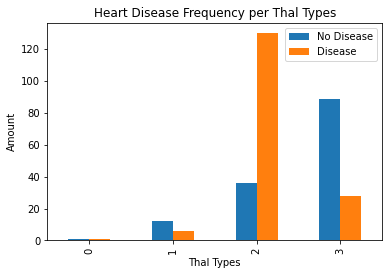

In [16]:
pd.crosstab(df['thal'],df['target']).plot(kind = 'bar')
plt.ylabel('Amount')
plt.xlabel('Thal Types')
plt.title("Heart Disease Frequency per Thal Types")
plt.legend(['No Disease','Disease'])

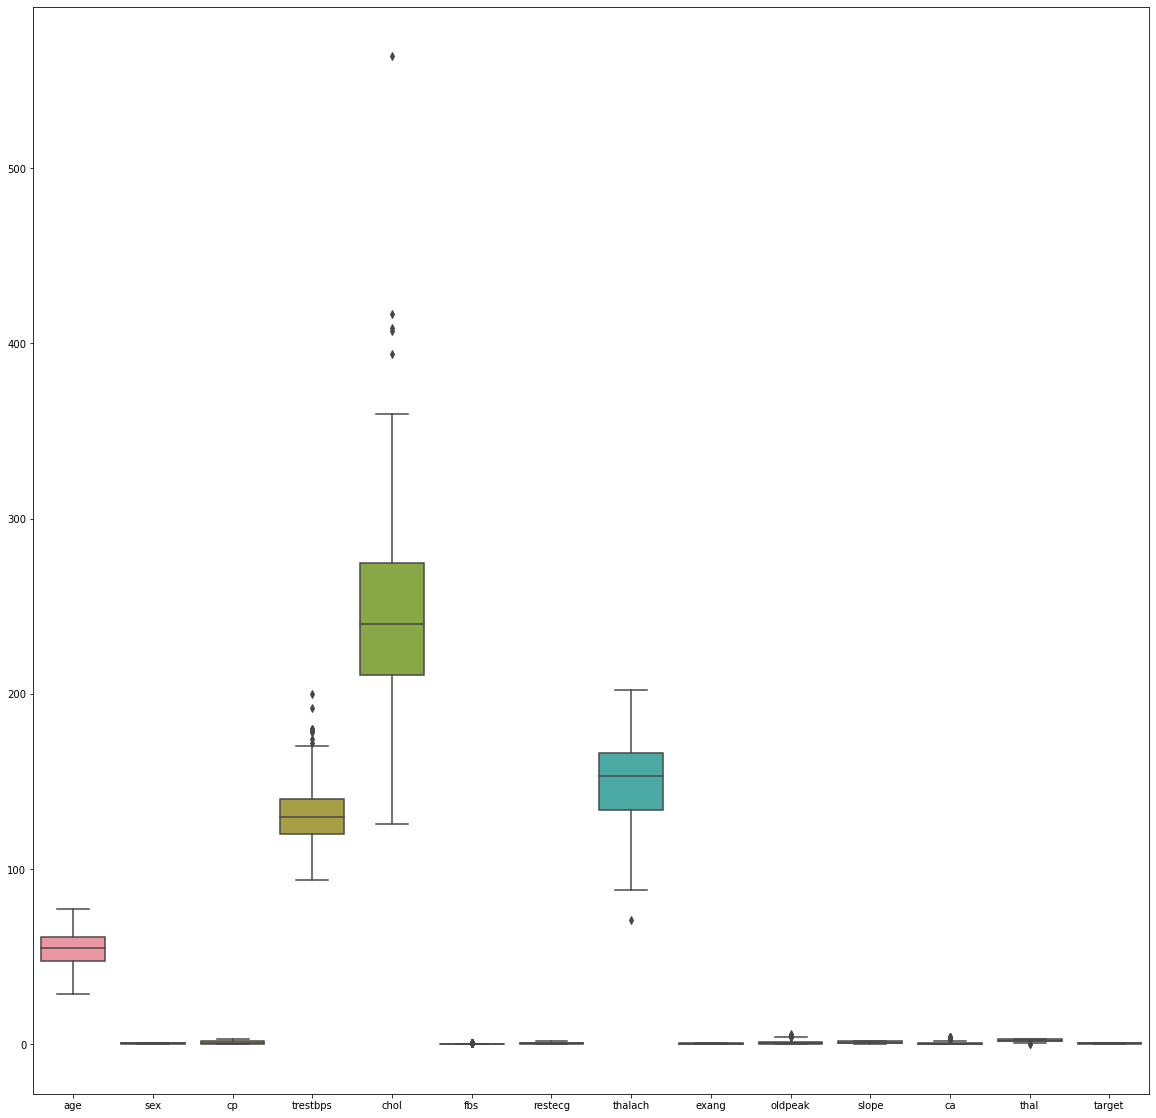

In [17]:
#after checking null values we'll check outliers in the dataset
plt.figure(figsize=(20,20))
ax=sns.boxplot(data=df)

In [18]:
 #Here we'll read and remove outlier's in the dataset using zscore matrix
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956  0.256334  2.394438  1.005832   
1    1.915313  0.681005  1.002577  0.092738  0.072199  0.417635  0.898962   
2    1.474158  1.468418  0.032031  0.092738  0.816773  0.417635  1.005832   
3    0.180175  0.681005  0.032031  0.663867  0.198357  0.417635  0.898962   
4    0.290464  1.468418  0.938515  0.663867  2.082050  0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464  1.468418  0.938515  0.478391  0.101730  0.417635  0.898962   
299  1.033002  0.681005  1.973123  1.234996  0.342756  0.417635  0.898962   
300  1.503641  0.681005  0.938515  0.706843  1.029353  2.394438  0.898962   
301  0.290464  0.681005  0.938515  0.092738  2.227533  0.417635  0.898962   
302  0.290464  1.468418  0.032031  0.092738  0.198357  0.417635  1.005832   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [19]:
threshold=3
# here we'll print z whose greater than third deviation
print(np.where(z > 3)) #The first array contains the list of row numbers and second array contains respective col

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [20]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [21]:
df = df[(z < 3).all(axis=1)]
df.shape #set the lower bound

(287, 14)

In [22]:
df=df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape#set the upper bound

(228, 14)

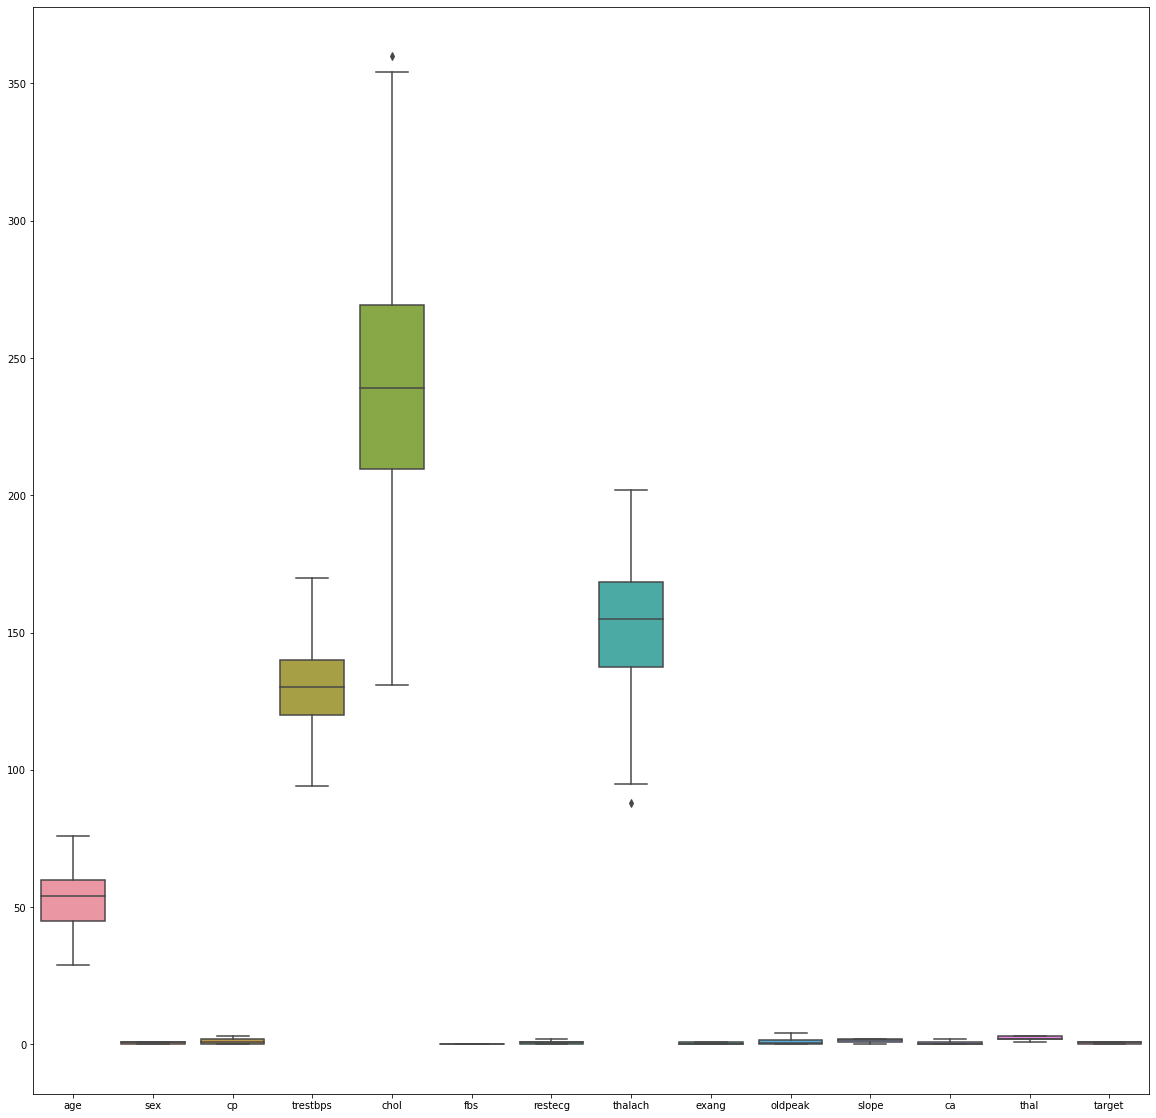

In [23]:
#To check whether the outlier's are removed
plt.figure(figsize=(20,20))
ax= sns.boxplot(data=df)

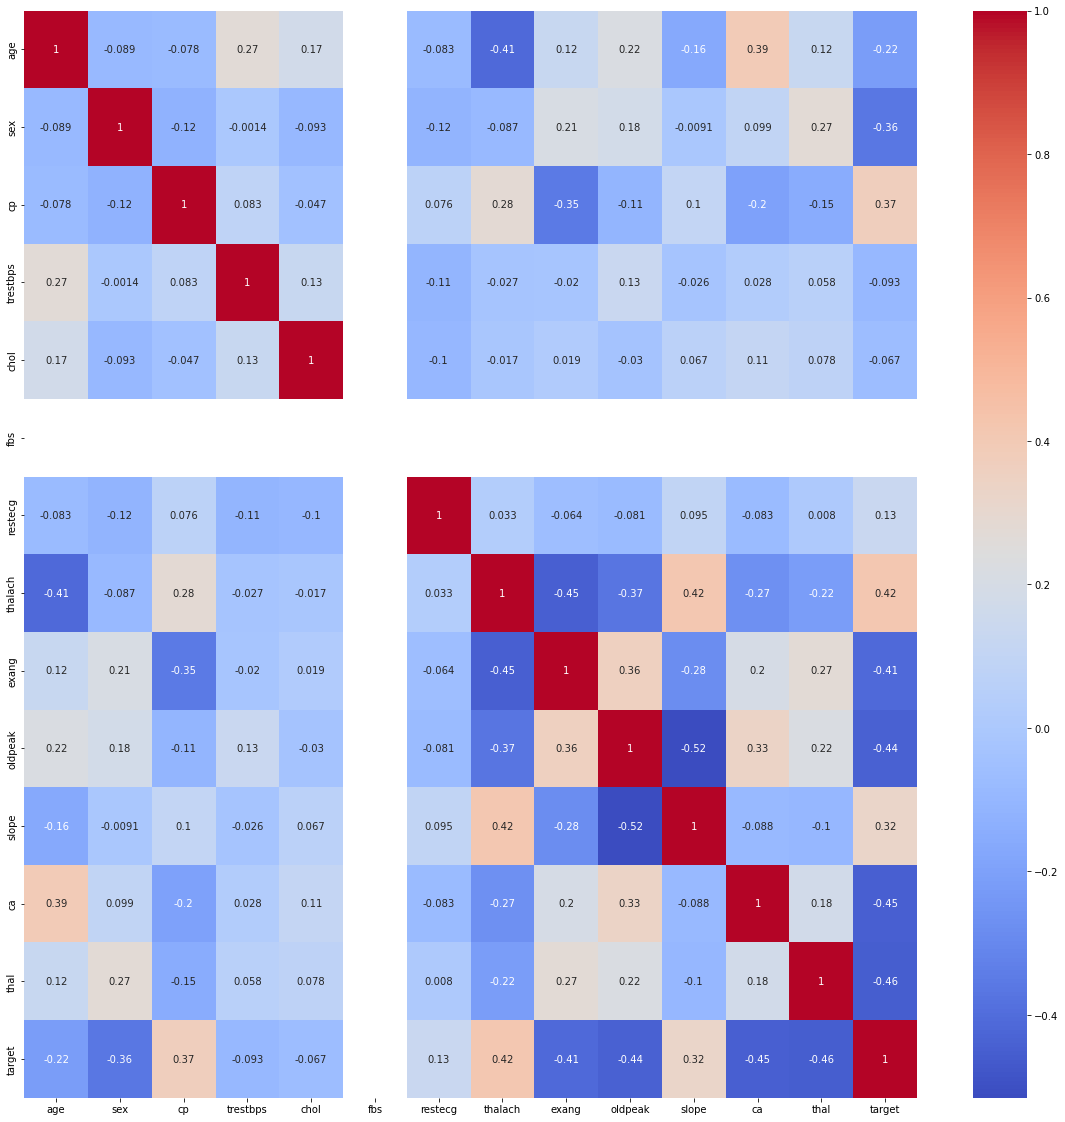

In [24]:
c=df.corr()
plt.figure(figsize=(20,20))
d= sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


In [26]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']) #creating my dummy variable
columns_to_scale= ['age','trestbps','chol','thalach','oldpeak'] # we have taken these columns for scale down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

dataset.head()

In [28]:
dataset.tail()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
296,1.049726,-0.304990,-1.025780,-0.671469,-0.915698,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
298,0.398172,0.739707,-0.031036,-1.250699,-0.722115,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
299,-0.904936,-1.219100,0.488943,-0.849694,0.245799,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
301,0.398172,0.086772,-2.517895,-1.607149,0.245799,0,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
302,0.398172,0.086772,-0.144075,1.021665,-0.915698,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [29]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.0000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,-3.569270e-16,-7.855558e-16,-7.413660e-17,-1.675073e-16,-2.415222e-16,0.578947,0.324561,0.675439,0.473684,0.184211,...,0.315789,0.048246,0.451754,0.5000,0.640351,0.241228,0.118421,0.048246,0.587719,0.364035
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,0.494814,0.469241,0.469241,0.500406,0.388509,...,0.465852,0.214756,0.498762,0.5011,0.480953,0.428770,0.323817,0.214756,0.493328,0.482217
min,-2.642413e+00,-2.263797e+00,-2.517895e+00,-2.810165e+00,-9.156982e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.049359e-01,-5.661639e-01,-7.375302e-01,-6.046350e-01,-9.156982e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.239487e-02,8.677171e-02,-7.625177e-02,1.750979e-01,-3.349494e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.5000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.239487e-01,7.397074e-01,6.076344e-01,7.654671e-01,6.329653e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.0000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.461426e+00,2.698514e+00,2.659293e+00,2.269238e+00,2.955960e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
y= dataset['target']
x= dataset.drop(['target'],axis=1)

In [31]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Model 1 : Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state=1) 
logistic_reg.fit(x_train, y_train) 
y_pred_logistic_reg = logistic_reg.predict(x_test)
accuracy_score(y_test,y_pred_logistic_reg)

0.8695652173913043

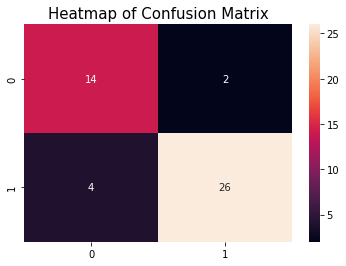

In [42]:
cm=confusion_matrix(y_test,y_pred_logistic_reg)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

# Model 2 : KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
score = cross_val_score(knn_classifier,x_train,y_train,cv=10)
y_pred_knn=knn_classifier.predict(x_test)
print(accuracy_score(y_test,y_pred_knn)) 

0.9130434782608695


In [44]:
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
score.mean()

0.8014619883040934

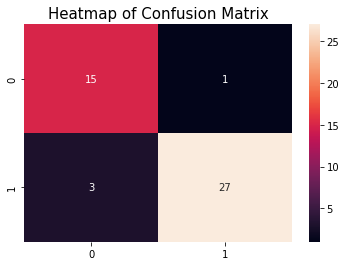

In [45]:
cm=confusion_matrix(y_test,y_pred_knn)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

# Model 3 : Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(x_train,y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.9130434782608695

In [47]:
score=cross_val_score(rf_classifier,x_train,y_train,cv=10)
score.mean()

0.8017543859649123

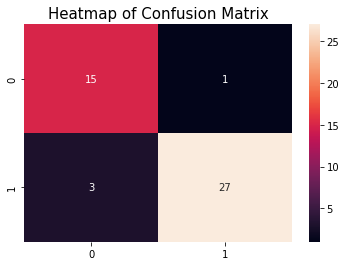

In [48]:
rf=confusion_matrix(y_test,y_pred_rf)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(rf,annot=True)
plt.show()

In [49]:
import pickle
import joblib
# saving our model # model - model , filename-model_jlib
joblib.dump(rf_classifier, 'model_jlib')


# opening the file- model_jlib
Heart_disease_detector_model = joblib.load('model_jlib')

# predict the output
y_pred = Heart_disease_detector_model.predict(x_test)

# confusion matrix
print('Confusion matrix of Random Forest Classifier model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of Random Forest Classifier  model = ',accuracy_score(y_test, y_pred))

Confusion matrix of Random Forest Classifier model: 
 [[15  1]
 [ 3 27]] 

Accuracy of Random Forest Classifier  model =  0.9130434782608695


In [50]:
import pickle
pickle.dump(rf_classifier,open('hdp_model.pkl','wb'))